In [1]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
plt.style.use('seaborn')

In [3]:
km=KMeans(n_clusters=200)

In [4]:
img = cv2.imread("./inout images/image1.jpg")
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

- <b>Region Grwoing</b> function

In [15]:
def region_growing(img):
    
    km.fit(img)
    centers= km.cluster_centers_
    cen=np.array(centers,dtype='uint8')
    
    new_img=np.zeros(img.shape,dtype='uint8')
    for i in range(new_img.shape[0]):
        new_img[i]=cen[km.labels_[i]]

    new_img=new_img.reshape((dil.shape))
    new_img=cv2.fastNlMeansDenoising(new_img,10,10,7,21)
    ret, thresh = cv2.threshold(new_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
    kernel_sharpening = np.array([[-1,-1,-1], 
                                  [-1, 9,-1],
                                  [-1,-1,-1]])

    sharpen = cv2.filter2D(thresh,-2, kernel_sharpening)
    
    return thresh

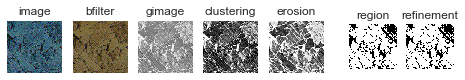

In [16]:
#kernal = np.ones((5,5), np.float32)/25

#dst = cv2.filter2D(img1, -1, kernal)#homogenenous

#gblur = cv2.GaussianBlur(img1,(5,5),0)#GaussianBlur

#mblur = cv2.medianBlur(img1, 5)#medianblur

bfilter = cv2.bilateralFilter(img1, 9, 75, 75)

gray1 = cv2.cvtColor(bfilter, cv2.COLOR_RGB2GRAY)

#status = cv2.imwrite('gray_image.jpg',gray1)

new_image = gray1.reshape((-1,3))

new_image = np.float32(new_image)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

k=8

attempts = 10

ret,label,center=cv2.kmeans(new_image,k,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

center = np.uint8(center)

res = center[label.flatten()]

res2 = res.reshape((gray1.shape))

kernal1 = np.ones((5,5), np.float32)/25

ero = cv2.erode(res2, kernal1, iterations= 1)

#ero=cv2.fastNlMeansDenoising(ero,10,10,7,21)

dil = cv2.dilate(ero, kernal1, iterations= 1)

opening = cv2.morphologyEx(res2, cv2.MORPH_OPEN, kernal1)

region = region_growing(opening)

refinement = cv2.addWeighted(region,1.5,dil,-0.5,0)

status1 = cv2.imwrite('refine_image.jpg',refinement)

titles = ['image', 'bfilter','gimage','clustering','erosion','dilation','region','refinement']

images = [img, bfilter, gray1, res2, ero, dil,region,refinement]

for i,title in enumerate(titles):
    if title == 'region' or title == 'refinement':
        plt.subplot(1,8,i+1),plt.imshow(images[i])
        plt.title(title)
        plt.xticks([]),plt.yticks([])
    else:
        plt.subplot(1,7,i+1),plt.imshow(images[i])
        plt.title(title)
        plt.xticks([]),plt.yticks([])
    
plt.show()

In [9]:
#plt.subplot?